# <font color=red>3.1. Extracting times series to build a functional connectome

</font>

In [2]:
from nilearn import datasets

In [6]:
dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')

In [10]:
atlas_filename = dataset.maps
labels = dataset.labels

In [12]:
from nilearn import plotting

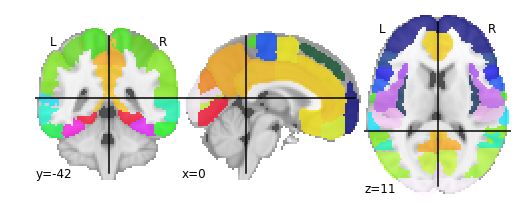

In [13]:
plotting.plot_roi(atlas_filename)

In [18]:
#import functional data
data = datasets.fetch_adhd(n_subjects=1)
fmri_filenames = data.func[0]

/Users/amr/anaconda3/lib/python3.7/site-packages/nilearn/datasets/func.py:503: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  dtype=None)


In [19]:
from nilearn.input_data import NiftiLabelsMasker
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True,
                          memory='nilearn_cache', verbose=5)

In [24]:
time_series = masker.fit_transform(fmri_filenames, confounds=data.confounds)

[NiftiLabelsMasker.fit_transform] loading data from /Users/amr/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
Resampling labels
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/Users/amr/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/Users/amr/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=['/Users/amr/nilearn_data/adhd/data/0010042/0010042_regressors.csv'], dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=5)
[NiftiLabelsMasker.transform_single_imgs] Loading data

In [27]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')

In [36]:
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

In [37]:
import numpy as np
from nilearn import plotting

In [38]:
np.fill_diagonal(correlation_matrix, 0)

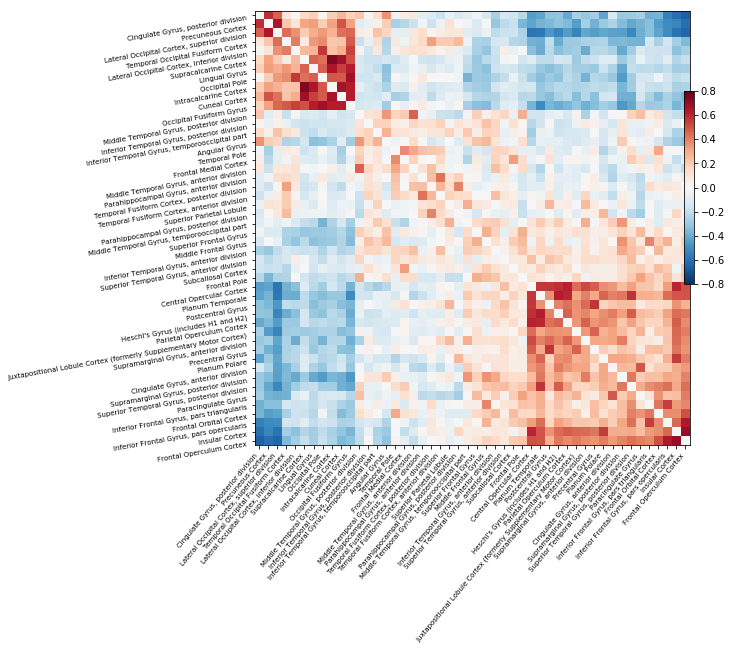

In [39]:
plotting.plot_matrix(correlation_matrix, figure=(10,8), labels=labels[1:],
                    vmax=0.8, vmin=-0.8, reorder=True)

In [41]:
time_series = masker.fit_transform(fmri_filenames)

[NiftiLabelsMasker.fit_transform] loading data from /Users/amr/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/Users/amr/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz', 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'labels_img': '/Users/amr/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii.gz',
  'low_pass': None,
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=5)
[NiftiLabelsMasker.transform_single_imgs] Loading data from /Users/amr/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.

In [42]:
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

In [43]:
np.fill_diagonal(correlation_matrix, 0)

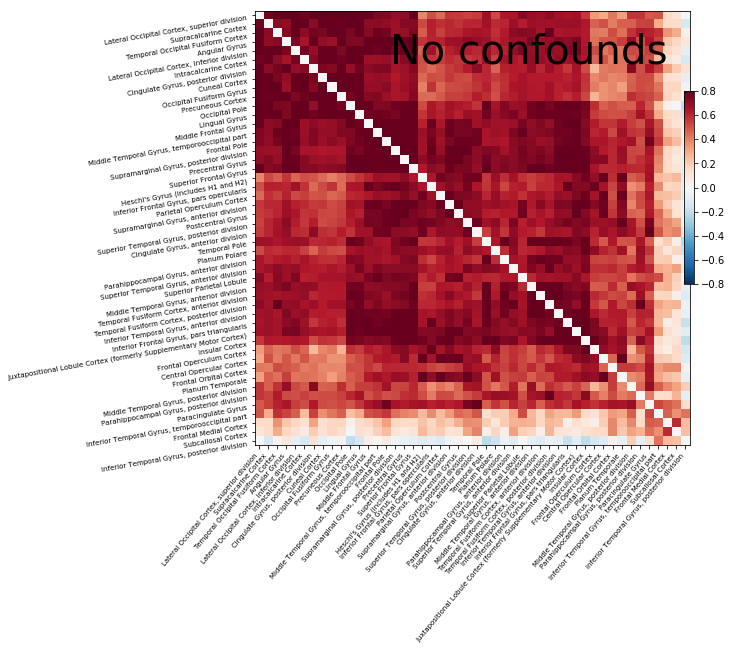

In [44]:
plotting.plot_matrix(correlation_matrix, figure=(10,8),
                    labels=labels[1:], vmax=0.8, vmin=-0.8,
                    title='No confounds', reorder=True)

In [45]:
time_series[0]

array([-0.42420045, -0.810823  , -1.1071258 , -0.96462584, -1.4338883 ,
       -1.0744281 , -1.3241878 , -1.1964129 ,  0.0478873 , -0.32951733,
       -1.1270125 ,  0.28968856, -0.60777205, -1.6706896 ,  0.75205547,
        1.0085065 , -1.0027273 , -0.92570853, -0.30121544, -0.7840285 ,
       -0.53315485, -1.0602261 , -0.5694276 , -1.2077861 ,  0.8597922 ,
       -1.0419573 ,  0.45978165,  0.26713362,  0.13372798, -0.1585848 ,
       -0.5446035 , -0.7544035 , -0.26062867, -1.3701813 , -0.66861147,
       -1.7032512 , -1.3848652 , -0.58720607, -0.15522555, -0.5356771 ,
       -0.9840854 , -1.2949971 , -1.4410701 , -0.35690147, -0.4900374 ,
       -0.8932879 , -1.0453011 , -1.5439475 ], dtype=float32)

## 3.1.2. Time-series from a probabilistic atlas¶ 

In [47]:
from nilearn import datasets
atlas_prob = datasets.fetch_atlas_msdl()


Dataset created in /Users/amr/nilearn_data/msdl_atlas



Downloaded 209734 of 209734 bytes (100.0%,    0.0s remaining) ...done. (0 seconds, 0 min)
Extracting data from /Users/amr/nilearn_data/msdl_atlas/5d25e157f36214b8ca9a12fd417aac1c/MSDL_rois.zip..... done.
/Users/amr/anaconda3/lib/python3.7/site-packages/numpy/lib/npyio.py:2278: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [48]:
atlas_prob_filename = atlas_prob.maps
atlas_prob_labels = atlas_prob.labels

In [52]:
from nilearn import image

/Users/amr/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:2788: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


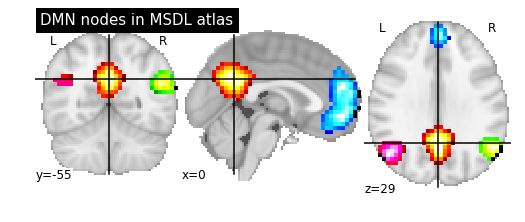

In [65]:
display = plotting.plot_stat_map(image.index_img(atlas_prob_filename, 4),
                                colorbar=False, title='DMN nodes in MSDL atlas')

display.add_overlay(image.index_img(atlas_prob_filename, 5),
                   cmap=plotting.cm.black_blue)

display.add_overlay(image.index_img(atlas_prob_filename, 6),
                   cmap=plotting.cm.black_green)

display.add_overlay(image.index_img(atlas_prob_filename, 3),
                   cmap=plotting.cm.black_pink)

/Users/amr/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


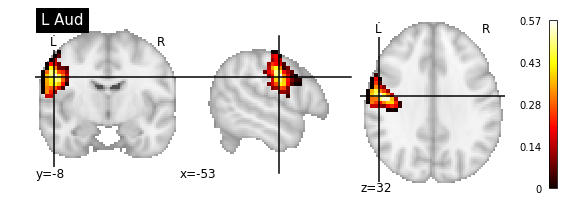

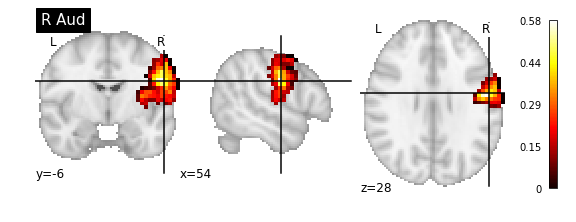

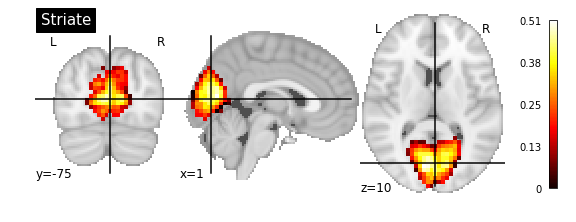

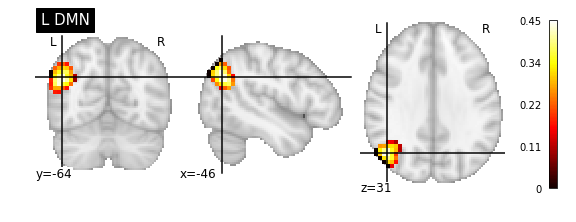

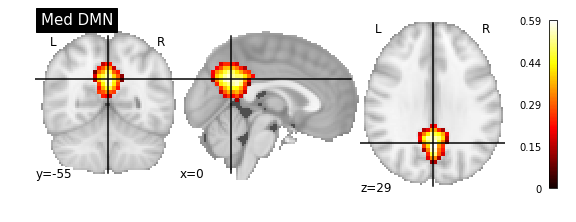

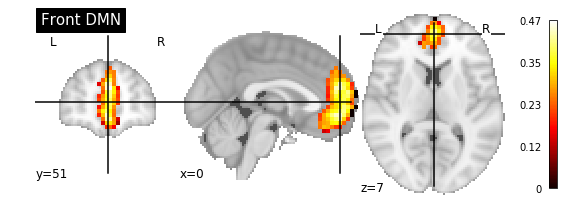

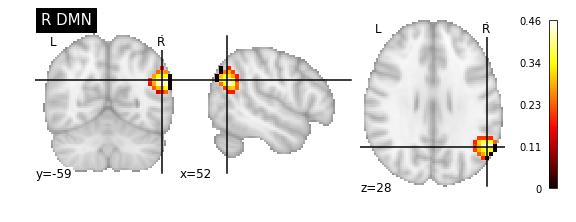

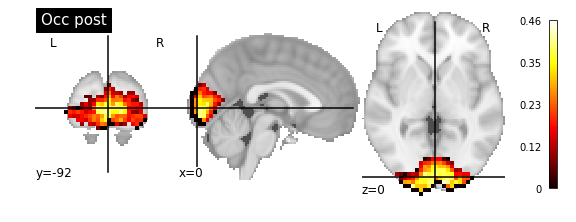

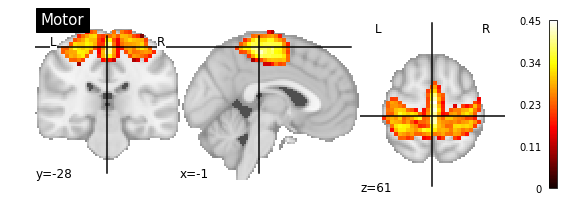

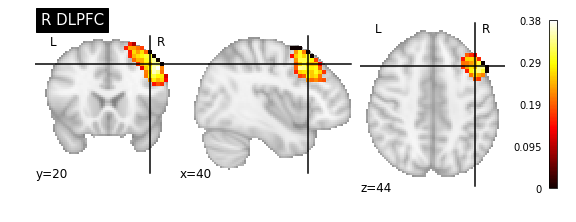

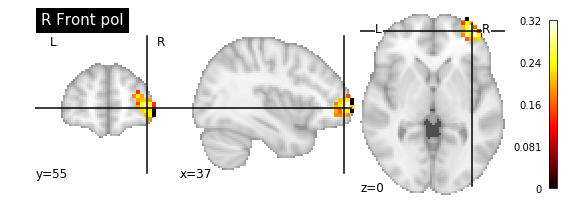

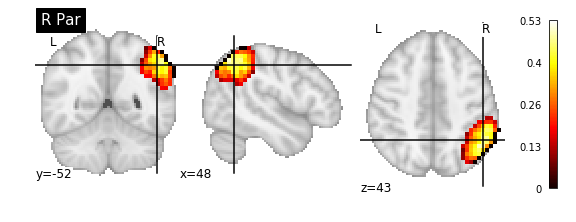

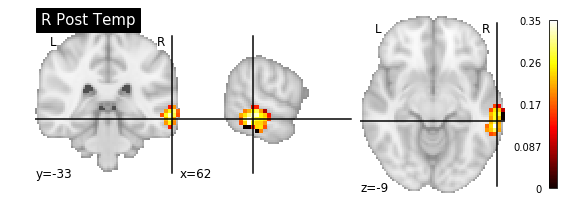

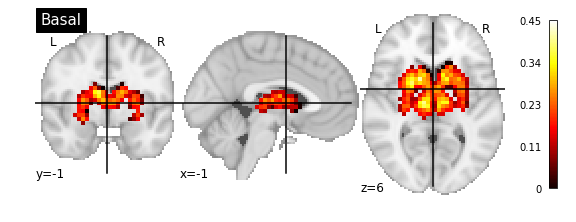

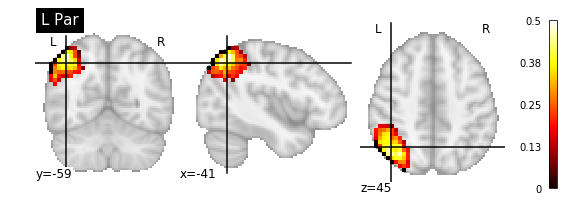

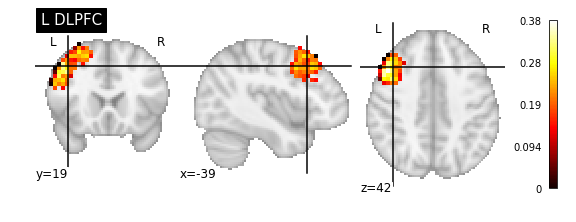

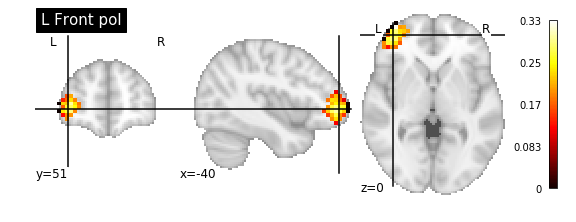

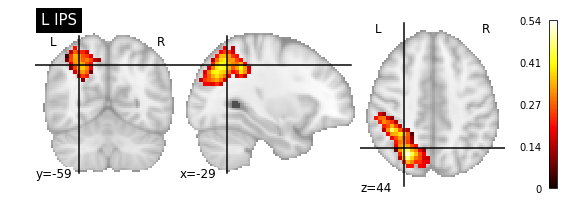

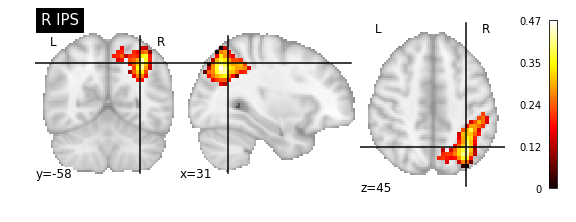

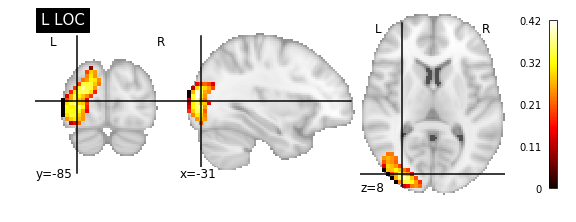

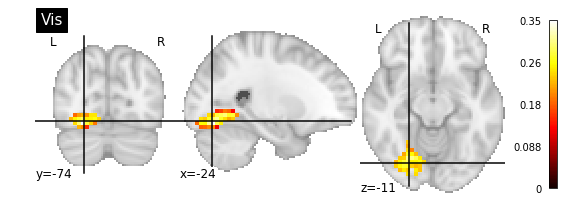

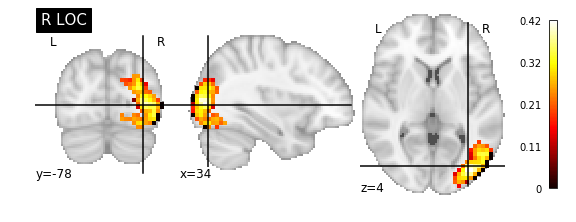

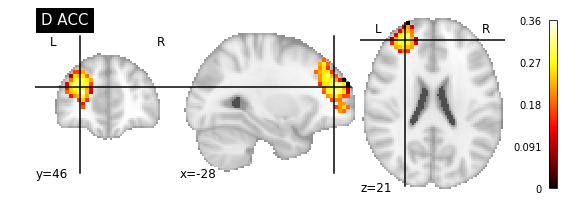

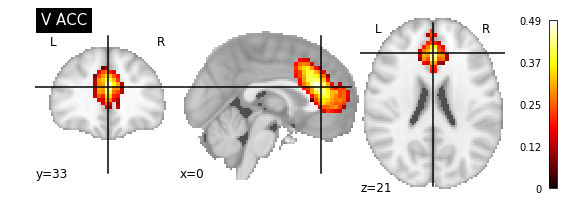

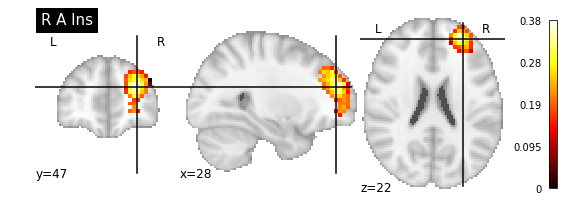

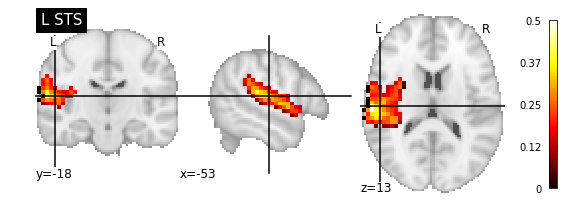

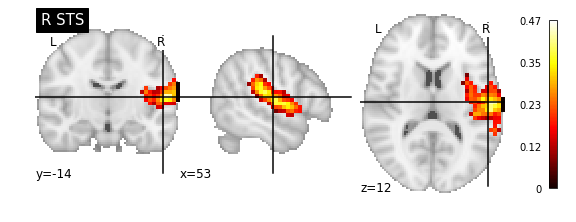

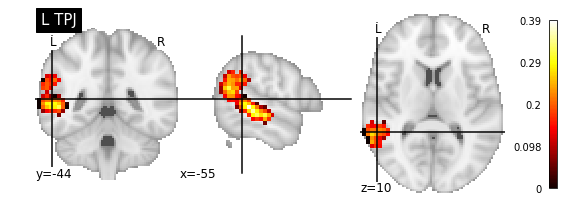

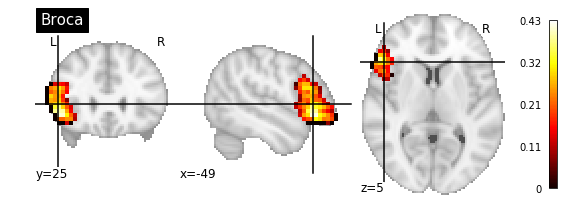

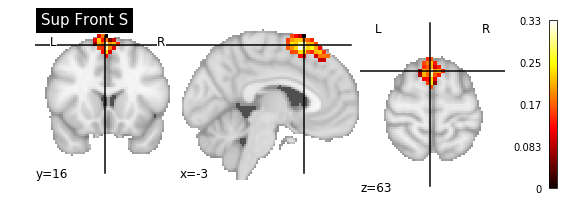

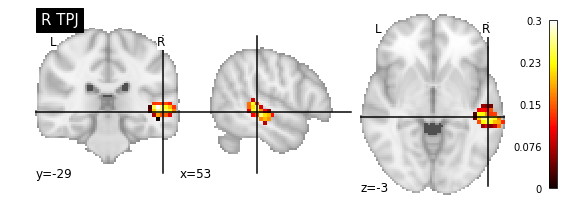

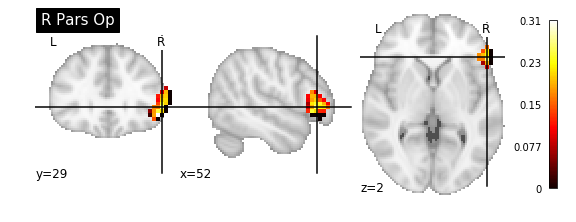

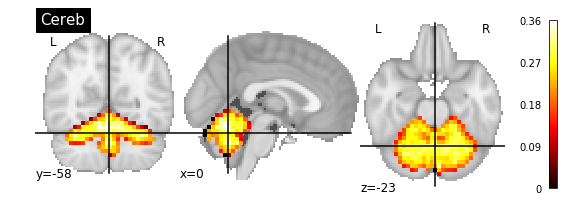

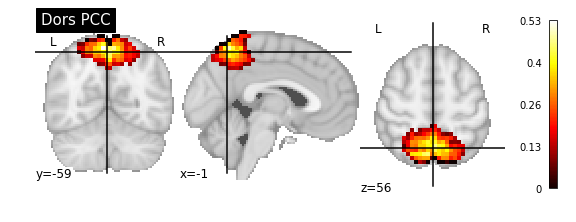

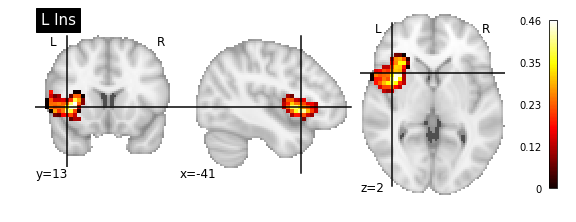

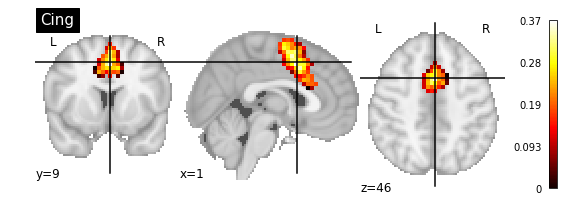

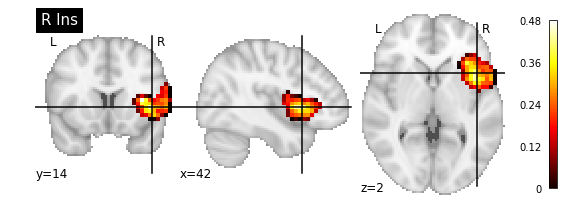

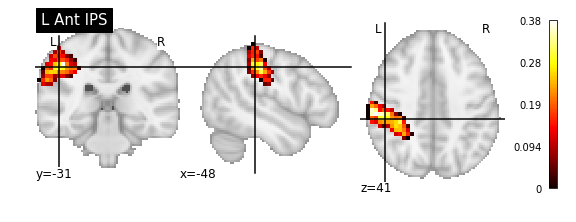

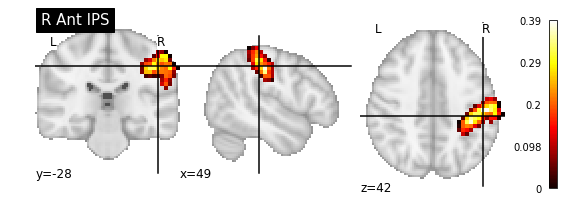

In [64]:
for i in range(len(atlas_prob_labels)):
    plotting.plot_stat_map(image.index_img(atlas_prob_filename, i),title='{0}'.format(atlas_prob_labels[i]))

#for img in image.iter_img(atlas_prob_filename):
#    plotting.plot_stat_map(img)

In [66]:
dmn_nodes = image.index_img(atlas_prob_filename, [3,4,5,6])
print(dmn_nodes.shape)

(40, 48, 35, 4)


/Users/amr/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:2788: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


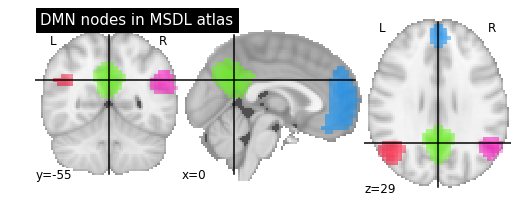

In [67]:
display = plotting.plot_prob_atlas(dmn_nodes, cut_coords=(0,-55,29),
                                  title="DMN nodes in MSDL atlas")

## 8.4.2. Extracting signals of a probabilistic atlas of rest functional regions 

In [1]:
from nilearn import datasets

In [2]:
atlas = datasets.fetch_atlas_msdl()

/Users/amr/anaconda3/lib/python3.7/site-packages/numpy/lib/npyio.py:2278: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [10]:

atlas_filename = atlas['maps']
labels = atlas['labels']

In [11]:
data = datasets.fetch_adhd(n_subjects=1)

/Users/amr/anaconda3/lib/python3.7/site-packages/nilearn/datasets/func.py:503: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  dtype=None)


In [12]:
print('First subject restin-state nifti image(4D) is located at {0}'.format(data.func[0]))

First subject restin-state nifti image(4D) is located at /Users/amr/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz


In [13]:
from nilearn.input_data import NiftiMapsMasker #in det atlas it was niftilabelsmasker

In [16]:
masker = NiftiMapsMasker(maps_img=atlas_filename, standardize=True, memory='nilearn_cache', verbose=5)

In [17]:
time_series = masker.fit_transform(data.func[0], confounds=data.confounds)

[NiftiMapsMasker.fit_transform] loading regions from /Users/amr/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
________________________________________________________________________________
[Memory] Calling nilearn.image.resampling.resample_img...
resample_img(<nibabel.nifti1.Nifti1Image object at 0x1c161e2160>, interpolation='continuous', target_shape=(61, 73, 61), target_affine=array([[  -3.,   -0.,   -0.,   90.],
       [  -0.,    3.,   -0., -126.],
       [   0.,    0.,    3.,  -72.],
       [   0.,    0.,    0.,    1.]]))


/Users/amr/anaconda3/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:302: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


_____________________________________________________resample_img - 4.8s, 0.1min
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/Users/amr/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz', 
{ 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'low_pass': None,
  'maps_img': '/Users/amr/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=['/Users/amr/nilearn_data/adhd/data/0010042/0010042_regressors.csv'], dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=5)
[NiftiMapsMasker.transform_single_imgs] Loading data from /Users/amr/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz
[NiftiMapsMasker.transform_single_imgs] Ext

In [18]:
time_series.shape

(176, 39)

In [19]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Front DMN')

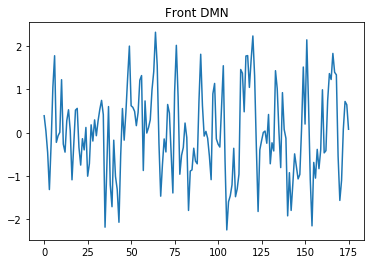

In [24]:
plt.plot(time_series[:,5]);
plt.title('{0}'.format(labels[5]))

In [25]:
from nilearn.connectome import ConnectivityMeasure

In [27]:
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

In [28]:
import numpy as np
from nilearn import plotting

In [29]:
np.fill_diagonal(correlation_matrix, 0)

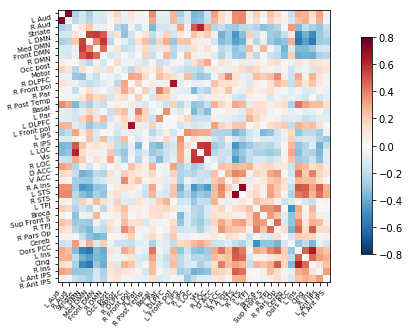

In [31]:

plotting.plot_matrix(correlation_matrix, labels=labels, colorbar=True, vmax=0.8, vmin=-0.8)

## 8.4.2.4. And now display the corresponding graph



In [32]:
from nilearn import plotting

In [33]:
coords = atlas.region_coords

/Users/amr/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


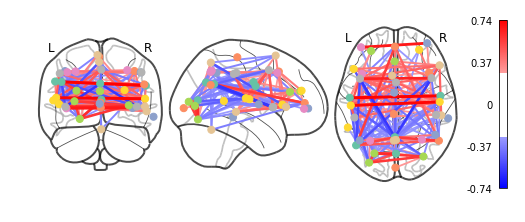

In [34]:
plotting.plot_connectome(correlation_matrix, coords, edge_threshold="80%", colorbar=True)

## 8.4.2.5. 3D visualization in a web browser



In [35]:
view = plotting.view_connectome(correlation_matrix, coords, threshold="80%")

/Users/amr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The parameter "threshold" will be removed in 0.6.0 release of Nilearn. Please use the parameter "edge_threshold" instead.
  """Entry point for launching an IPython kernel.


In [36]:
view.open_in_browser()

In [37]:
view

## 8.4.9. Comparing connectomes on different reference atlases

In [39]:
from nilearn import datasets

In [42]:
yeo = datasets.fetch_atlas_yeo_2011()

print('Yeo atlas nifti image (3D) with 17 parcels and liberal mask is located at: {0}'.format(yeo['thick_17']))

Yeo atlas nifti image (3D) with 17 parcels and liberal mask is located at: /Users/amr/nilearn_data/yeo_2011/Yeo_JNeurophysiol11_MNI152/Yeo2011_17Networks_MNI152_FreeSurferConformed1mm_LiberalMask.nii.gz


In [43]:
data = datasets.fetch_adhd(n_subjects=10);

/Users/amr/anaconda3/lib/python3.7/site-packages/nilearn/datasets/func.py:503: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  dtype=None)


In [47]:
print(data.func[0])
print(data.confounds[0])

/Users/amr/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz
/Users/amr/nilearn_data/adhd/data/0010042/0010042_regressors.csv


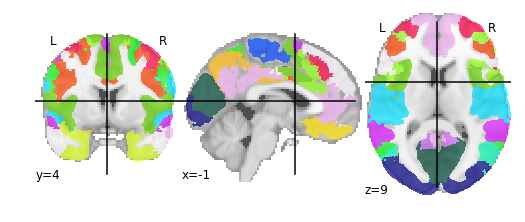

In [51]:
plotting.plot_roi(yeo.thick_17)

extract coordinates, this is of prime interest as you can do this with mice

In [53]:
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure

In [54]:
connectome_measure = ConnectivityMeasure(kind='correlation')

In [58]:
#standardize: boolean, optional
#    If standardize is True, the time-series are centered and normed:
#    their mean is put to 0 and their variance to 1 in the time dimension.

masker = NiftiLabelsMasker(labels_img=yeo['thick_17'], standardize=True, memory='nilearn_cache')

In [59]:
#extract time series from all subjects and concatenate them
time_series = []
for func, confounds in zip(data.func, data.confounds):
    time_series.append(masker.fit_transform(func, confounds=confounds))

In [62]:
correlation_matrices = connectome_measure.fit_transform(time_series)

In [63]:
#Mean correlation matrix across 10 subjects can be grabbed like this,
# using connectome measure object
mean_correlation_matrix = connectome_measure.mean_

In [64]:
coordinates = plotting.find_parcellation_cut_coords(labels_img=yeo['thick_17'])

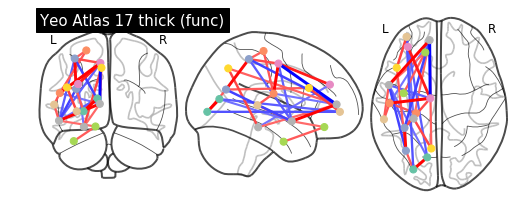

In [69]:
plotting.plot_connectome(mean_correlation_matrix, coordinates, edge_threshold='80%',
                        title='Yeo Atlas 17 thick (func)')

## 8.4.9.4. Load probabilistic atlases - extracting coordinates on brain maps

In [70]:
msdl = datasets.fetch_atlas_msdl()

/Users/amr/anaconda3/lib/python3.7/site-packages/numpy/lib/npyio.py:2278: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [74]:
from nilearn.input_data import NiftiMapsMasker
masker = NiftiMapsMasker(maps_img=msdl['maps'], standardize=True,
                        memory='nilearn_cache')

In [75]:
time_series = []

In [76]:
for func, confounds in zip(data.func, data.confounds):
    time_series.append(masker.fit_transform(func, confounds=confounds))

/Users/amr/anaconda3/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:302: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


In [77]:
correlation_matrices = connectome_measure.fit_transform(time_series)

In [79]:
#########################correlation_measure NOT correlation_matrix
mean_correlation_matrix = correlation_measure.mean_

In [80]:
coordinates = plotting.find_probabilistic_atlas_cut_coords(maps_img=msdl['maps'])

/Users/amr/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


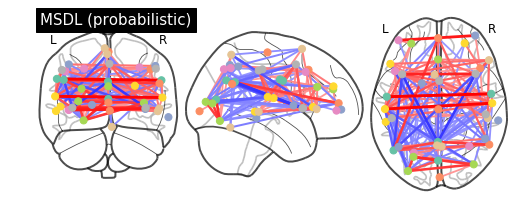

In [81]:
plotting.plot_connectome(mean_correlation_matrix, coordinates,
                        edge_threshold="80%", title='MSDL (probabilistic)')

## 8.4.11. Group Sparse inverse covariance for multi-subject connectome¶ 

In [82]:
import numpy as np
from nilearn import plotting

In [83]:
n_subjects = 4

In [84]:
def plot_matrices(cov, prec, title, labels):
    """Plot covariance and precision matrices, for a given processing"""
    prec = prec.copy() #avoid side effects
    
    #put zeros on the diagonal, for graph clarity
    size = prec.shape[0]
    prec[list(range(size)), list(range(size))] = 0
    span = max(abs(prec.min()), abs(prec.max()))
    
    plotting.plot_matrix(cov, cmap=plotting.cm.bwr,
                    
                         vmin=-1, vmax=1, title="%s / covariance" %title, labels=labels)

In [85]:
msdl_atlas_dataset = datasets.fetch_atlas_msdl()
adhd_dataset = datasets.fetch_adhd(n_subjects=10)

/Users/amr/anaconda3/lib/python3.7/site-packages/numpy/lib/npyio.py:2278: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)
/Users/amr/anaconda3/lib/python3.7/site-packages/nilearn/datasets/func.py:503: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  dtype=None)


In [86]:
from nilearn import image
from nilearn import input_data

In [87]:
#a memory to avoid recomputation
from sklearn.externals.joblib import Memory
mem = Memory('nilearn_cache')

In [ ]:
masker = input_data.NiftiMapsMasker(
        msdl_atlas_dataset.maps, resampling_target='maps', detrend=True,
        low_pass=None, high_pass=0.01, t_r=2.5, standardize=True,
        memory='nilearn_cache', memory_level=1, verbose=2)


##################################################

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting

In [53]:
def plot_matrices(matrices, matrix_kind, labels):
    n_matrices = len(matrices)
    fig = plt.figure(figsize=(n_matrices * 4,4))
    for n_subject, matrix in enumerate(matrices):
        plt.subplot(1, n_matrices, n_subject + 1)
        matrix = matrix.copy()
        
        np.fill_diagonal(matrix, 0)
        vmax = np.max(np.abs(matrix))
        title = '{0}, subject{1}'.format(matrix_kind, n_subject)
        plotting.plot_matrix(matrix, vmin=-vmax, vmax=vmax, cmap='RdBu_r',
                            title=title, figure=fig, colorbar=False, labels=labels)

In [5]:
from nilearn import datasets
adhd_data = datasets.fetch_adhd(n_subjects=20)

/Users/amr/anaconda3/lib/python3.7/site-packages/nilearn/datasets/func.py:503: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  dtype=None)


In [7]:
msdl_data = datasets.fetch_atlas_msdl()
msdl_coords = msdl_data.region_coords
n_regions = len(msdl_coords)
print('MSDL has {0} ROIs, part of the following networks :\n{1}.'.format(
    n_regions,  msdl_data.networks))

MSDL has 39 ROIs, part of the following networks :
[b'Aud', b'Aud', b'Striate', b'DMN', b'DMN', b'DMN', b'DMN', b'Occ post', b'Motor', b'R V Att', b'R V Att', b'R V Att', b'R V Att', b'Basal', b'L V Att', b'L V Att', b'L V Att', b'D Att', b'D Att', b'Vis Sec', b'Vis Sec', b'Vis Sec', b'Salience', b'Salience', b'Salience', b'Temporal', b'Temporal', b'Language', b'Language', b'Language', b'Language', b'Language', b'Cereb', b'Dors PCC', b'Cing-Ins', b'Cing-Ins', b'Cing-Ins', b'Ant IPS', b'Ant IPS'].


/Users/amr/anaconda3/lib/python3.7/site-packages/numpy/lib/npyio.py:2278: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [8]:
from nilearn import input_data

masker = input_data.NiftiMapsMasker(
                    msdl_data.maps, resampling_target='data', t_r=2.5, detrend=True,
                    low_pass=.1, high_pass=.01, memory='nilearn_cache', memory_level=1)

In [30]:
adhd_subjects = []
pooled_subjects = []
site_names = []
adhd_labels = []
for func_file, confound_file, phenotypic in zip(adhd_data.func, adhd_data.confounds, adhd_data.phenotypic):
    time_series = masker.fit_transform(func_file, confounds=confound_file)
    pooled_subjects.append(time_series)
    is_adhd = phenotypic['adhd']
    if is_adhd:
        adhd_subjects.append(time_series)
    site_names.append(phenotypic['site'])
    adhd_labels.append(is_adhd)

print('Data has {0} ADHD subjects'.format(len(adhd_subjects)))

/Users/amr/anaconda3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


Data has 13 ADHD subjects


In [31]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')

In [35]:
correlation_matrices = correlation_measure.fit_transform(adhd_subjects)

print('Correlation of ADHD patients are stacked in an array of shape {0}'.format(correlation_matrices.shape))

Correlation of ADHD patients are stacked in an array of shape (13, 39, 39)


In [36]:
mean_correlation_matrix = correlation_measure.mean_
print('Mean correlation has shape {0}'.format(mean_correlation_matrix.shape))

Mean correlation has shape (39, 39)


In [37]:
from nilearn import plotting

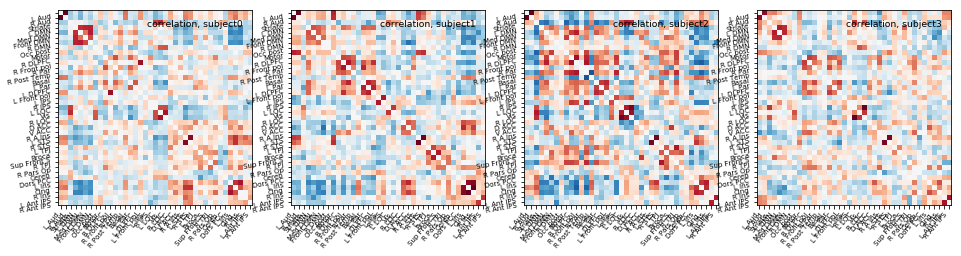

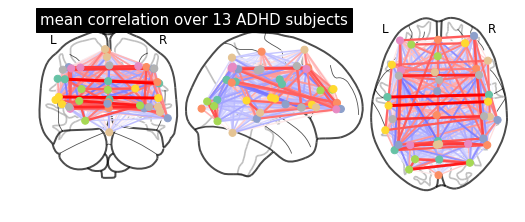

In [54]:
plot_matrices(correlation_matrices[:4], 'correlation', msdl_data.labels)
plotting.plot_connectome(mean_correlation_matrix, msdl_coords, title='mean correlation over 13 ADHD subjects')

### partial correlation 

In [49]:
partial_correlation_measure = ConnectivityMeasure(kind='partial correlation')

In [50]:
partial_correlation_matrices = partial_correlation_measure.fit_transform(adhd_subjects)

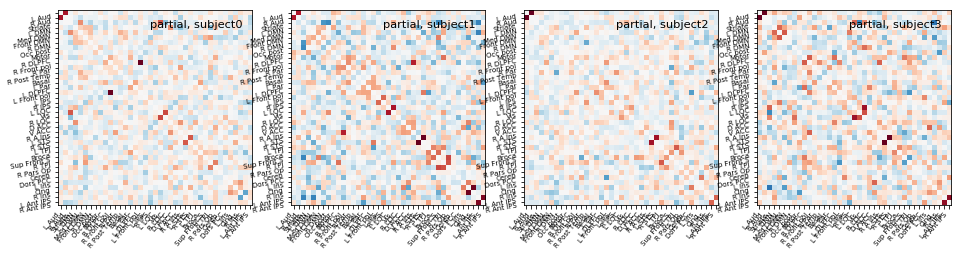

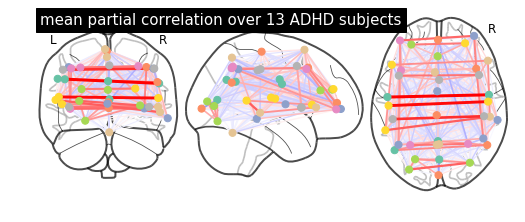

In [55]:
plot_matrices(partial_correlation_matrices[:4], 'partial', msdl_data.labels)
plotting.plot_connectome(partial_correlation_measure.mean_, msdl_coords, 
                        title='mean partial correlation over 13 ADHD subjects')

### tangent correlation

In [64]:
tangent_measure = ConnectivityMeasure(kind='tangent')

In [65]:
tangent_matrices = tangent_measure.fit_transform(adhd_subjects)

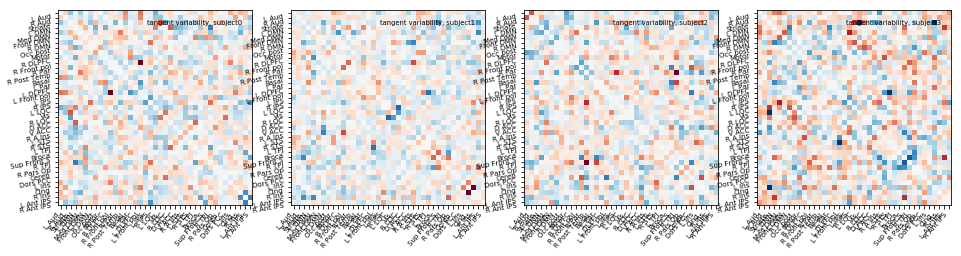

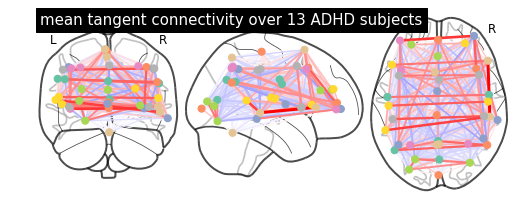

In [66]:
plot_matrices(tangent_matrices[:4], 'tangent variability', msdl_data.labels)
plotting.plot_connectome(tangent_measure.mean_, msdl_coords,
                        title='mean tangent connectivity over 13 ADHD subjects')

### what correlation measure is most powerful for classification

In [67]:
connectivity_biomarkers = {}
kinds = ['correlation', 'partial correlation', 'tangent']
for kind in kinds:
    conn_measure = ConnectivityMeasure(kind=kind, vectorize=True)
    connectivity_biomarkers[kind] = conn_measure.fit_transform(pooled_subjects)
    
print('{0} correlation biomarkers for each subject'.format(connectivity_biomarkers['correlation'].shape[1]))

780 correlation biomarkers for each subject


In [69]:
from sklearn.model_selection import StratifiedKFold
classes = ['{0}{1}'.format(site_name, adhd_label)
          for site_name, adhd_label in zip(site_names, adhd_labels)]
cv = StratifiedKFold(n_splits=3)

In [70]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

In [71]:
mean_scores = []
for kind in kinds:
    svc = LinearSVC(random_state=0)
    cv_scores = cross_val_score(svc,
                               connectivity_biomarkers[kind],
                               y=adhd_labels,
                               cv=cv,
                               groups=adhd_labels,
                               scoring='accuracy')
    mean_scores.append(cv_scores.mean())

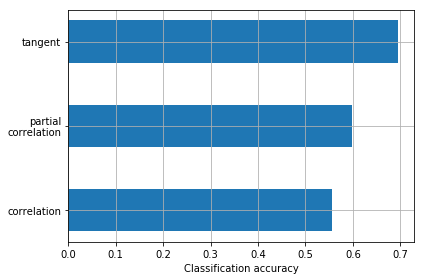

In [72]:
from nilearn.plotting import show

plt.figure(figsize=(6,4))
positions = np.arange(len(kinds)) * .1 + .1
plt.barh(positions, mean_scores, align='center', height=.05)
yticks = [kind.replace(' ', '\n') for kind in kinds]
plt.yticks(positions, yticks)
plt.xlabel('Classification accuracy')
plt.grid(True)
plt.tight_layout()

In [78]:
connectivity_biomarkers['correlation'].shape

(20, 780)

In [79]:
classes


['b\'"NYU"\'1',
 'b\'"NYU"\'1',
 'b\'"NYU"\'0',
 'b\'"NYU"\'0',
 'b\'"OHSU"\'0',
 'b\'"OHSU"\'1',
 'b\'"NeuroImage"\'1',
 'b\'"NeuroImage"\'1',
 'b\'"NeuroImage"\'1',
 'b\'"NeuroImage"\'1',
 'b\'"KKI"\'1',
 'b\'"OHSU"\'1',
 'b\'"OHSU"\'0',
 'b\'"Peking_1"\'0',
 'b\'"OHSU"\'1',
 'b\'"Peking_2"\'0',
 'b\'"OHSU"\'0',
 'b\'"KKI"\'1',
 'b\'"NYU"\'1',
 'b\'"Peking_2"\'1']